In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

   -- The attributes are:
<ol>   
<li>Alcohol</li>
<li> Malic acid</li>
<li>Ash</li>
<li>Alcalinity of ash </li> 
<li>Magnesium</li>
<li>Total phenols</li>
<li>Flavanoids</li>
<li>Nonflavanoid phenols</li>
<li>Proanthocyanins</li>
<li>Color intensity</li>
<li>Hue</li>
<li>OD280/OD315 of diluted wines</li>
<li>Proline </li>
    </ol>

#### Data Source : <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/wine/">Machine Learning Repository</a>

In [2]:
df=pd.read_csv("wine.csv",names=['Class','Alcohol','M_acid','Ash','Alc_ash','Mag','phenols','Flavanoids','Non_phenols','Proanthocyanins','C_ntensity','Hue','diluted_wines','Proline'])
df.head()

,Class,Alcohol,M_acid,Ash,Alc_ash,Mag,phenols,Flavanoids,Non_phenols,Proanthocyanins,C_ntensity,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df['Class'].value_counts() #target variable

2    71
1    59
3    48
Name: Class, dtype: int64

In [9]:
df.shape

(178, 14)

In [10]:
df.isnull().sum()

Class              0
Alcohol            0
M_acid             0
Ash                0
Alc_ash            0
Mag                0
phenols            0
Flavanoids         0
Non_phenols        0
Proanthocyanins    0
C_ntensity         0
Hue                0
diluted_wines      0
Proline            0
dtype: int64

In [4]:
df.groupby('Class').mean()

,Alcohol,M_acid,Ash,Alc_ash,Mag,phenols,Flavanoids,Non_phenols,Proanthocyanins,C_ntensity,Hue,diluted_wines,Proline
Class,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


Text(0.5, 1.0, 'Alcohol vs Class')

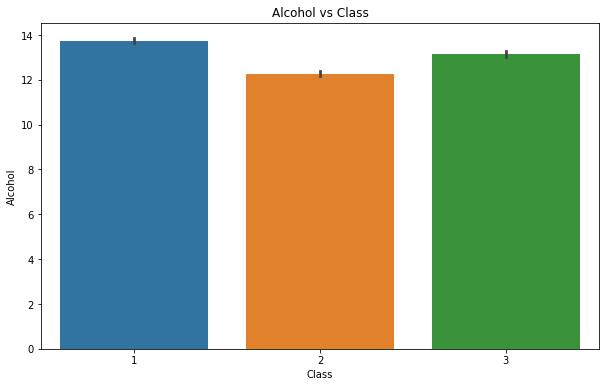

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x='Class',y='Alcohol',data=df)
plt.title('Alcohol vs Class')

Text(0.5, 1.0, 'Proline vs Class')

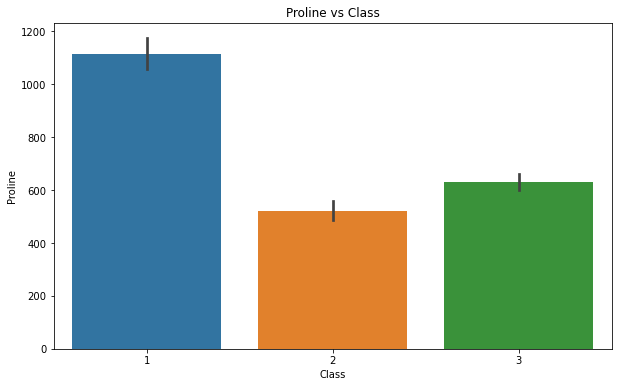

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='Class',y='Proline',data=df)
plt.title('Proline vs Class')

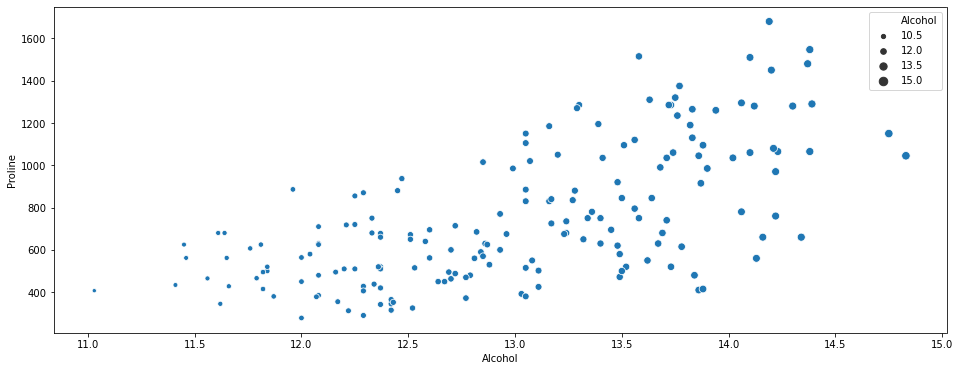

In [9]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='Alcohol',y='Proline',data=df,size='Alcohol')

# Feature Selection

In [10]:
df.columns

Index(['Class', 'Alcohol', 'M_acid', 'Ash', 'Alc_ash', 'Mag', 'phenols',
       'Flavanoids', 'Non_phenols', 'Proanthocyanins', 'C_ntensity', 'Hue',
       'diluted_wines', 'Proline'],
      dtype='object')

In [11]:
X=df[df.columns[1:]]
X

,Alcohol,M_acid,Ash,Alc_ash,Mag,phenols,Flavanoids,Non_phenols,Proanthocyanins,C_ntensity,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
y=df['Class']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

# Normalizing the data

In [13]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)
print('Train Shape:{}'.format(x_train.shape))
print('Train Shape:{}'.format(y_train.shape))

Train Shape:(142, 13)
Train Shape:(142,)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
k_value=[]
acc=[]
for k in range(1,12):
    knn=KNeighborsClassifier(n_neighbors=k,)
    knn.fit(x_train,y_train)
    y_pr=knn.predict(x_test)
    k_value.append(k)
    acc.append(accuracy_score(y_test,y_pr))
    print()
    print(k)
    print('Score:%.2f'%knn.score(x_test,y_test))
    print('Accuracy Score:%.2f'%accuracy_score(y_test,y_pr))
    print('F1 Score:%.2f'%f1_score(y_test,y_pr,average='weighted'))


1
Score:0.92
Accuracy Score:0.92
F1 Score:0.91

2
Score:0.92
Accuracy Score:0.92
F1 Score:0.92

3
Score:0.97
Accuracy Score:0.97
F1 Score:0.97

4
Score:0.92
Accuracy Score:0.92
F1 Score:0.92

5
Score:0.92
Accuracy Score:0.92
F1 Score:0.91

6
Score:0.86
Accuracy Score:0.86
F1 Score:0.85

7
Score:0.92
Accuracy Score:0.92
F1 Score:0.92

8
Score:0.92
Accuracy Score:0.92
F1 Score:0.92

9
Score:0.97
Accuracy Score:0.97
F1 Score:0.97

10
Score:0.92
Accuracy Score:0.92
F1 Score:0.92

11
Score:0.94
Accuracy Score:0.94
F1 Score:0.94


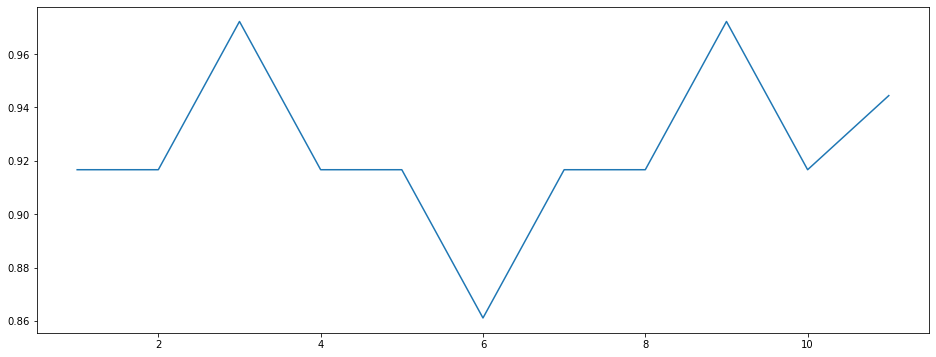

In [17]:
plt.figure(figsize=(16,6))
sns.lineplot(x=k_value,y=acc)

### We can see at k=3 and k=9 accuracy is maximum

In [30]:
algo_name=[]
accuracy=[]
fscore=[]


Score:0.97
Accuracy Score:0.97
F1 Score:0.97


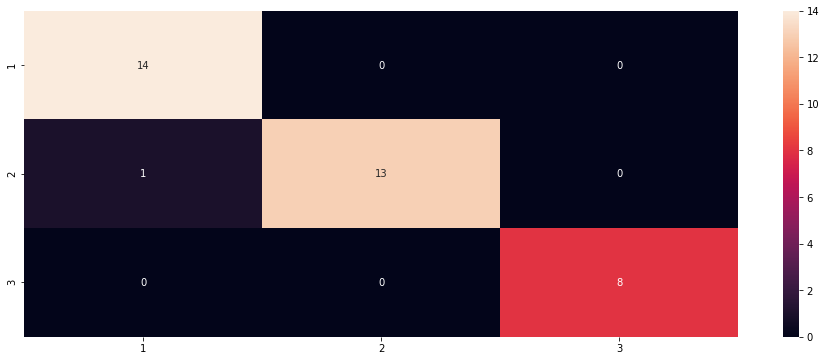

In [31]:
from sklearn.metrics import log_loss,jaccard_score
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pr=knn.predict(x_test)
cnm=confusion_matrix(y_test,y_pr)
y_pr[0:5]
ac=accuracy_score(y_test,y_pr)
f1=f1_score(y_test,y_pr,average='weighted')

print()
print('Score:%.2f'%knn.score(x_test,y_test))
print('Accuracy Score:%.2f'%ac)
print('F1 Score:%.2f'%f1)
algo_name.append('KNeighborsClassifier')
accuracy.append(ac)
fscore.append(f1)


plt.figure(figsize=(16,6))
sns.heatmap(cnm,annot=True,xticklabels=['1','2','3'],yticklabels=['1','2','3'])

#### As we can see both accuracy score and f1 score is 0.97 which is preety good

# Checking other Classifiers 

### <li>Logistic Regression</li>


Score:0.97
Accuracy Score:0.94
F1 Score:0.94


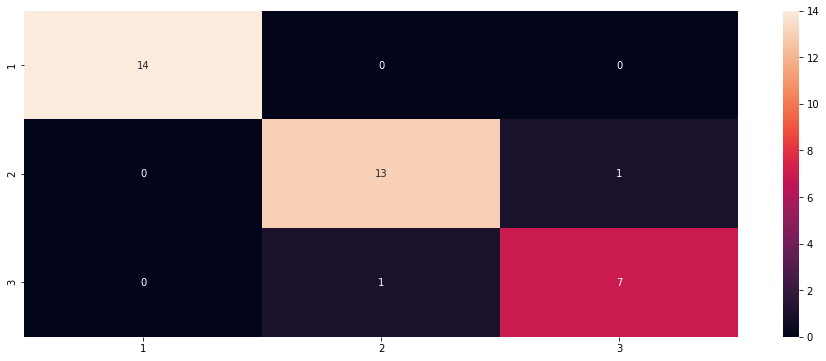

In [32]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_lr_pr=lr.predict(x_test)
cn_lr=confusion_matrix(y_test,y_lr_pr)

ac=accuracy_score(y_test,y_lr_pr)
f1=f1_score(y_test,y_lr_pr,average='weighted')

print()
print('Score:%.2f'%knn.score(x_test,y_test))
print('Accuracy Score:%.2f'%accuracy_score(y_test,y_lr_pr))
print('F1 Score:%.2f'%f1_score(y_test,y_lr_pr,average='weighted'))
algo_name.append('LogisticRegression')
accuracy.append(ac)
fscore.append(f1)

plt.figure(figsize=(16,6))
sns.heatmap(cn_lr,annot=True,xticklabels=['1','2','3'],yticklabels=['1','2','3'])

#### Here both accuracy and f1 score goes down so it is clearly not a good model compare to KNN model

## Decision Tree Classifier


Score:0.97
Accuracy Score:0.97
F1 Score:0.97


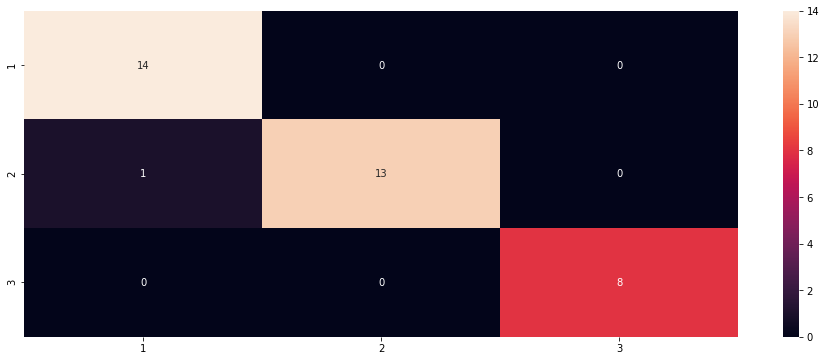

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dt.fit(x_train,y_train)
y_dt_pr=dt.predict(x_test)
cn_dt=confusion_matrix(y_test,y_dt_pr)

ac=accuracy_score(y_test,y_dt_pr)
f1=f1_score(y_test,y_dt_pr,average='weighted')

print()
print('Score:%.2f'%knn.score(x_test,y_test))
print('Accuracy Score:%.2f'%accuracy_score(y_test,y_dt_pr))
print('F1 Score:%.2f'%f1_score(y_test,y_dt_pr,average='weighted'))
algo_name.append('DecisionTreeClassifier')
accuracy.append(ac)
fscore.append(f1)

plt.figure(figsize=(16,6))
sns.heatmap(cn_dt,annot=True,xticklabels=['1','2','3'],yticklabels=['1','2','3'])

#### Both Accuracy and F1 score remain unchanged

## Support Vactor Machine


Score:0.97
Accuracy Score:0.97
F1 Score:0.97


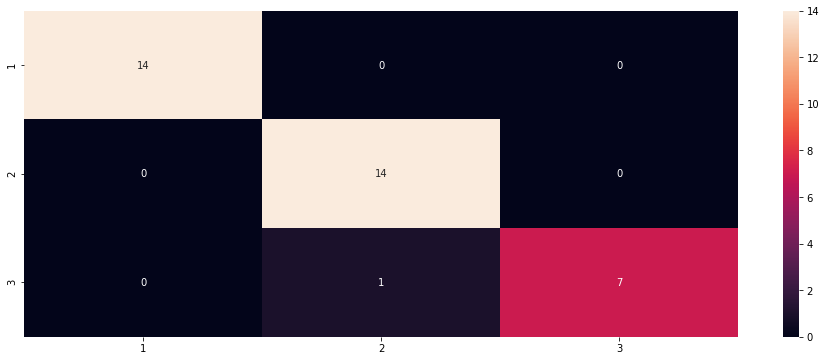

In [34]:
from sklearn.svm import SVC
sv=SVC(kernel='rbf')
sv.fit(x_train,y_train)
y_svm_pr=sv.predict(x_test)
cn_svm=confusion_matrix(y_test,y_svm_pr)

ac=accuracy_score(y_test,y_svm_pr)
f1=f1_score(y_test,y_svm_pr,average='weighted')

print()
print('Score:%.2f'%knn.score(x_test,y_test))
print('Accuracy Score:%.2f'%accuracy_score(y_test,y_svm_pr))
print('F1 Score:%.2f'%f1_score(y_test,y_svm_pr,average='weighted'))
algo_name.append('Support Vector Machine')
accuracy.append(ac)
fscore.append(f1)


plt.figure(figsize=(16,6))
sns.heatmap(cn_svm,annot=True,xticklabels=['1','2','3'],yticklabels=['1','2','3'])

#### Again Both accuracy and score remain unchanged but this time it predicted more no of class 2 then 3.


Score:0.89
Accuracy Score:0.89
F1 Score:0.89


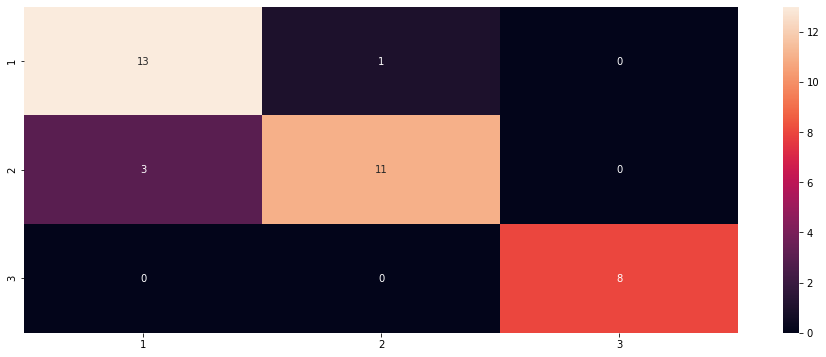

In [35]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
y_abc=abc.predict(x_test)

abc_svm=confusion_matrix(y_test,y_abc)

ac=accuracy_score(y_test,y_abc)
f1=f1_score(y_test,y_abc,average='weighted')

print()
print('Score:%.2f'%abc.score(x_test,y_test))
print('Accuracy Score:%.2f'%accuracy_score(y_test,y_abc))
print('F1 Score:%.2f'%f1_score(y_test,y_abc,average='weighted'))
algo_name.append('AdaBoostClassifier')
accuracy.append(ac)
fscore.append(f1)

plt.figure(figsize=(16,6))
sns.heatmap(abc_svm,annot=True,xticklabels=['1','2','3'],yticklabels=['1','2','3'])

In [37]:
df_score_table=pd.concat([pd.DataFrame(algo_name),pd.DataFrame(fscore),pd.DataFrame(accuracy)],axis=1)
df_score_table.columns=['Algorithm Name','F1 Score','Accuracy Score']
df_score_table

,Algorithm Name,F1 Score,Accuracy Score
0,KNeighborsClassifier,0.972187,0.972222
1,LogisticRegression,0.944444,0.944444
2,DecisionTreeClassifier,0.972187,0.972222
3,Support Vector Machine,0.971775,0.972222
4,AdaBoostClassifier,0.888319,0.888889


<p> Accuracy goes down when using AdaBoostClassifier,clearly not a good model </p>

In [ ]:
# from sklearn.svm import SVC
# kernal=['rbf','sigmoid','poly','linear']
# for k in kernal:
#     sv=SVC(kernel=k)
#     sv.fit(x_train,y_train)
#     y_svm_pr=sv.predict(x_test)
# #     cn_svm=confusion_matrix(y_test,y_svm_pr)

#     print()
#     print(k)
#     print('Score:%.2f'%knn.score(x_test,y_test))
#     print('Accuracy Score:%.2f'%accuracy_score(y_test,y_svm_pr))
#     print('F1 Score:%.2f'%f1_score(y_test,y_svm_pr,average='weighted'))

# plt.figure(figsize=(16,6))
# sns.heatmap(cn_svm,annot=True,xticklabels=['1','2','3'],yticklabels=['1','2','3'])

## Conclusion

### From above model and graph we can say we can use any of the model except LogisticRegression Model.

In [38]:
#saving the model
import pickle
filename = 'wine_classification.sav'
pickle.dump(sv, open(filename, 'wb'))
print('Model Saved!!')

Model Saved!!


In [47]:
# loading the model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print('Model Loaded Successfully!!')
print('Accuracy:%.2f'%result)

Model Loaded Successfully!!
Accuracy:0.97
